In [1]:
import numpy as np
import matplotlib.pyplot as plt
import deepdish as dd
import seaborn as sns

res = dd.io.load("results.h5")

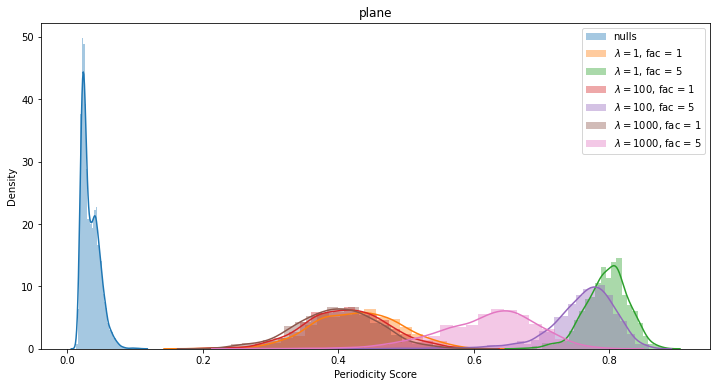

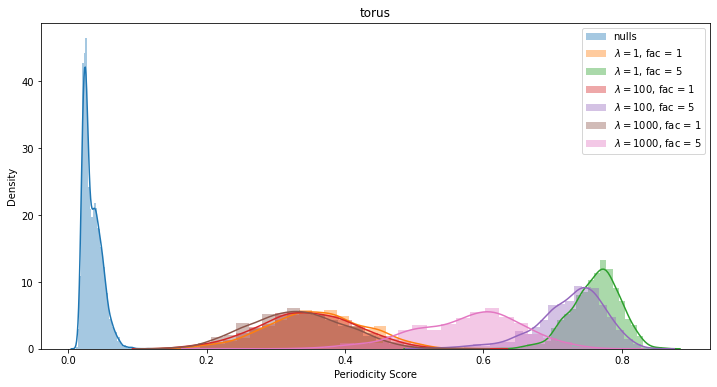

In [2]:
def get_score(I):
    score = 0
    if I.shape[0] > 0:
        score = np.max(I[:, 1] - I[:, 0])
    return score

for manifold in ['plane', 'torus']:
    results = {'nulls':[]}
    for lambda1 in [1, 100, 1000]:
        for fac in [1, 5]:
            save_key = "{}_{}".format(lambda1, fac)
            results[save_key] = []
            for key in res:
                if "{}_{}_{}_normal".format(manifold, lambda1, fac) in key:
                    results[save_key].append(get_score(res[key]['PDs'][1]))
                elif "{}_{}_{}_permuted".format(manifold, lambda1, fac) in key:
                    results['nulls'].append(get_score(res[key]['PDs'][1]))

    plt.figure(figsize=(12, 6))
    keys = list(results.keys())
    for key in keys:
        sns.distplot(results[key])
    legend = []
    for key in keys:
        if key == "nulls":
            legend.append(key)
        else:
            lambda1, fac = [int(x) for x in key.split("_")]
            legend.append("$\\lambda = {}$, fac = {}".format(lambda1, fac))
    plt.legend(legend)
    plt.title(manifold)
    plt.xlabel("Periodicity Score")
    plt.ylabel("Density")
    plt.savefig("{}.svg".format(manifold), bbox_inches='tight')